# **ch 7 딥러닝을 시작합니다**

## **07-1 인공 신경망**


#### **1) 딥러닝을 위한 텐서플로와 케라스, GPU**

* **tensorflow, keras** : 지난 학기 머신러닝을 공부할 때 우리는 거의 **사이킷런(sklearn)**을 이용했다. 이번 학기에 공부할 내용은 딥러닝인데 딥러닝은 <u>신경망을 이용한 머신러닝 알고리즘</u>이라고 할 수 있다. 딥러닝은 사이킷런 대신 <u>텐서플로와 케라스</u>를 이용한다.

  <u>tensorflow는 현재 가장 인기 높은 머신러닝, 딥러닝 라이브러리 중 하나이며 keras는 텐서플로와 함께 쓰는 고수준 API 패키지</u>다. 여기서 '고수준'이란 수준 높고 어렵다는 뜻이 아니고 세부적인 사항들을 몰라도 쉽게 이용할 수 있게 만들어둔 패키지라는 의미다. 즉 keras를 공부하면 고생하지 않고도 어지간한 딥러닝은 거의 다 할 수 있다는 뜻.

  tensorflow, keras에 대한 도움말이나 여러 자료들은 아래 사이트에서 볼 수 있다.

  [tensorflow](https://www.tensorflow.org/?hl=ko)

  [keras](https://keras.io/ko/)

    - 케라스(κέρας)는 그리스어로 뿔 이라는 뜻 (https://keras.io/ko/).

* **GPU** : 딥러닝 라이브러리들은 많은 행렬 계산이 필요하므로 속도를 높이기 위해 GPU(Graphics Processing Unit)를 이용해서 신경망을 훈련한다. 교재 351쪽 설명에서 볼 수 있듯 Colab에서는 무료로 GPU를 이용할 수 있으며 <u> Colab 기본 메뉴 가운데 '런타임'의 '런타임 유형 변경'을 선택하여 적절한 하드웨어 가속기를 선택</u>할 수 있다.

  **CPU, GPU, TPU, NPU**에 대한 설명이 더 필요하면 인터넷 검색 이용.

### **7-1-1 Fashion MNIST**

<u>tensorflow에서 제공하는 keras 모듈의 datasets 폴더 안에는 딥러닝을 연습하기 위한 여러 데이터세트들이 들어있다.</u>
그 가운데 교재 7장에서 이용하는 데이터셋은 **"패션 MNIST 데이터"**다.

보통 손글씨 숫자들로 이루어진 MNIST 데이터가 유명한데 fashion MNIST 데이터(`fashion_mnist`)도 그 데이터를 바탕으로 만든 것이다. 간단히 `keras.datasets`로부터 `load_data()`를 이용해서 아래와 같이 불러오면 된다.

In [1]:
from tensorflow import keras

(train,target1),(test,target2)=keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


* 퀴즈 : 위의 코드를 아래와 같이 괄호가 없이 입력한다면 어떻게 될까?

In [2]:
# train_input, train_target, test_input, test_target = keras.datasets.fashion_mnist.load_data()

오류가 생기는 이유는? [`fashion-MNIST` 데이터세트에 대한 설명](https://keras.io/ko/datasets/#-mnist)을 잠깐 보자. `load_data()`로 불러온 결과는 train, test 데이터 별로 (input, target)으로 이루어진 2개의 튜플이다. 따라서 괄호가 없으면 오류가 생긴다.

* 퀴즈 : `train_input, train_target, test_input, test_target`의 데이터 타입은 무엇인가?

In [3]:
print(train.shape, target1.shape)
print(test.shape, target2.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


각 배열의 shape을 확인해보면 train 데이터셋은 6만개, test 데이터셋은 1만개의 이미지로 이루어져 있음을 알 수 있다. 각 target 데이터는 1차원 배열이고 input 데이터는 $28 \times 28$ 2차원 배열로 되어있다.

따라서 `train`은 2차원 배열 60,000개로 이루어진 3차원 배열이고 `test`는 2차원 배열 10,000개로 이루어진 3차원 배열이다.

이미지 데이터는 `matplotlib.pyplot`에 있는 `imshow()`를 이용해서 그림으로 나타낼 수 있다.

`train_input`데이터의 맨 첫번째 이미지를 그려보자.

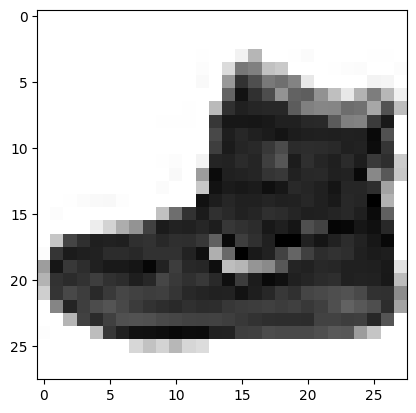

In [4]:
import matplotlib.pyplot as plt

plt.imshow(train[0],cmap='gray_r')

이번에는 `plt.subplots()`와 반복문을 이용해서 `train_input` 데이터 가운데 처음 10개를 한꺼번에 그려보자.

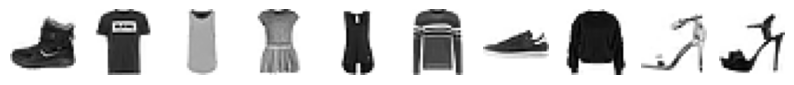

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize = (10, 10))

for i in range(10):
    axs[i].imshow(train[i], cmap = 'gray_r')
    axs[i].axis('off')

In [6]:
target1[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

**그림 연습**: 11번째부터 29번째까지 20개 이미지를 두 줄의 그림으로 나타내보자.

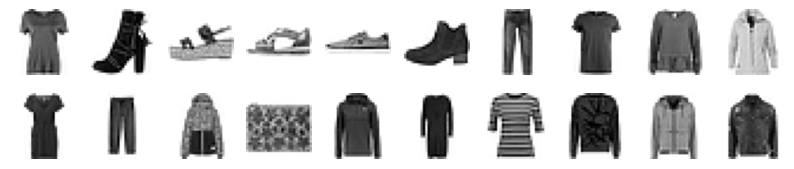

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 10, figsize = (10, 2))

for j in range(2):
  for i in range(10):
    axs[j,i].imshow(train[10*(j+1) + i], cmap = 'gray_r')
    axs[j, i].axis('off')

6만개 train 데이터의 타깃값 분포를 보려면

In [8]:
import numpy as np

np.unique(target1, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

### **7-1-2 로지스틱 회귀로 패션 아이템 분류하기**

* 먼저 교재 4장 가운데 183쪽 이후의 내용을 중심으로 로지스틱 회귀와 확률적경사하강법에 대해 복습한 다음 딥러닝 공부를 시작하자.

  - 로지스틱회귀는 분류알고리즘으로서 지도학습에 속한다
  - 타깃변수는 범주형변수로서 범주가 둘이면 2진분류, 셋 이상이면 다중 분류 모델을 만든다

  - 범주별로 예측확률(`predict_prob`)을 구해서 그 확률이 가장 큰 범주로 데이터를 분류한다.
  - 이진 분류 모델에서는 로지스틱함수(시그모이드 함수)를, 다중 분류 모델에서는 소프트맥스 함수를 이용해서 예측확률을 계산한다
  - **'손실함수'**란 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준이다(203쪽)
  - 이진분류에서는 로지스틱 손실함수(이진 크로스엔트로피 손실함수)를, 다중 분류에서는 크로스엔트로피 손실함수를 사용한다
  - 경사하강법은 점진적으로 손실함수의 최소값으로 접근하면서 좋은 모델(가중치)을 찾아가는 방법이다
  - 훈련데이터세트에서 데이터를 하나씩 이용하는 경사하강법을 **확률적경사하강법**이라 부르고, 확률적경사하강법을 반복하다 훈련 세트를 전부 사용하는 과정을 **'에포크'**라고 부른다.

`train_input`의 첫번째 데이터를 살펴보자.

In [9]:
train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [10]:
train[0].shape

(28, 28)

`train, test`에는 0부터 255사이의 정수값들이 들어있는데, 숫자가 나타내는 것은 $28 \times 28 = 784$개 각 픽셀의 흑백 이미지 강도다. 즉 숫자가 큰 픽셀이 짙은 색이고 0에 가까운 픽셀은 옅은색이다.

먼저 정수로 된 이 값들을 0과 1 사이의 실수로 바꾸자(이미지 데이터 처리에서 흔히 볼 수 있는 과정으로서 일종의 표준화 과정이라고 생각하면 된다).

In [11]:
strain=train/255.0

사이킷런에서 확률적경사하강법을 이용한 로지스틱회귀 `SGDClassifier`를 이용하려면 각 입력데이터가 1차원 배열이어야하므로(즉 입력하는 2차원 배열 X의 shape이 (number of samples, number of features)이어야한다), `train_scaled`에 있는 각 2차원 배열들을 `reshape()`을 이용해서 1차원 배열로 바꾸자.

만약 아래와 같이 1차원 배열로 바꾸면 무슨 문제가 생길까?

In [12]:
ts = strain.reshape(-1,)
len(ts)

47040000

우리가 필요로 하는 배열은 아래와 같이 길이가 784인 1차원 배열이 60000개 있는 2차원 배열이다. 즉 **$60000 \times 28 \times 28$ 크기의 3차원 배열 `train_scaled`를 $60000 \times 784$인 2차원 배열로 만들어야한다.**

In [13]:
strain = strain.reshape(-1, 28**2)

In [14]:
strain.shape

(60000, 784)

이렇게 만든 데이터의 784개 컬럼이 피처변수가 된다. 이제 10개의 각 타깃값에 대해 하나씩 모두 10개의 로지스틱회귀모델을 만들어서 각 타깃값의 예측확률을 구한 다음, 그 결과를 가지고 데이터를 분류하면 된다(346쪽 그림과 설명 참조).

사이킷런(아직 딥러닝 모델이 아니다)의 `linear_model` 안에 있는 `SGDClassifier`로 다중 로지스틱회귀 모델을 만들고 교차검증으로 성능을 평가해보자.

In [15]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
import numpy as np

m = SGDClassifier(loss='log_loss', max_iter=5, random_state=0)

cv = cross_validate(m, strain, target1, n_jobs=-1,return_train_score = True)

print(np.mean(cv['train_score']),np.mean(cv['test_score']))

0.8285458333333333 0.81735


만족스러운 성능은 아니다. 교재(p. 345)를 따라 반복횟수(`max_iter = `)를 늘여도 큰 변화는 없을 것이다.

여기까지는 로지스틱회귀 복습. 이제 사이킷런대신 케라스를 이용해서 간단한 인공신경망 모델을 만들어 데이터를 분류해보자.

### **7-1-3 인공신경망**

간단한 인공신경망 모델은 로지스틱회귀 모델과 비슷하다. 먼저 교재 346쪽, 348쪽의 그림을 비교해보고, 348-349쪽 설명을 따라 **'입력층', '출력층', '뉴런'('유닛')** 등의 용어를 학습하자.

### **7-1-4 인공신경망으로 모델 만들기**

인공신경망 모델에서는 교차검증 대신 아래와 같이 검증 데이터세트(validation dataset)를 따로 만들어서 모델 검증에 이용한다(이유는? 352쪽 설명 참조). 실습에 이용하는 데이터는 패션 mnist 데이터다.

In [16]:
from sklearn.model_selection import train_test_split

strain,val,target1,target3=train_test_split(strain,target1,random_state=0)

In [17]:
print(strain.shape, target1.shape)
print(val.shape, target3.shape)

(45000, 784) (45000,)
(15000, 784) (15000,)


60,000개 `train_scaled` 데이터를 8:2로 나눈 결과 48,000개로 이루어진 `train_scaled`, 12,000개로 이루어진 `val_scaled` 데이터가 생겼다. 우리는 `train_scaled`데이터로 모델을 훈련하고 `val_scaled` 데이터로 모델의 성능을 검증할 것이다.

353쪽 그림을 보자. 48,000개 `train_scaled` 데이터는 784개의 feature 변수를 가지고 있으며 `train_target` 데이터의 범주 수는 10개다. 즉 입력층의 뉴런 수가 784개이고 출력층의 뉴런은 10개다. 입력층의 각 뉴런마다 가중치를 부여해서 출력층의 뉴런을 만들기 때문에 모두 $784 \times 10 = 7,840$ 개의 연결이 필요하다. 353쪽 아래 그림처럼 좌우의 뉴런들이 서로 모두 연결된 층을 **'완전 연결층(fully connected layer)'**, 또는 **'밀집층(dense layer)'**이라고 부른다.  

케라스에서는 `layers` 모듈 안에 있는 `Dense()`를 이용해서 밀집층을 만들 수 있다. 이때 필요한 파라미터는 <u>출력층 뉴런의 개수, 뉴런 출력에 이용할 활성화 함수(activation function), 그리고 입력층의 크기</u> 등이다. 케라스는 기본적으로 32개 데이터로 이루어진 미니배치 경사하강법을 사용한다.

여기서는 분류 범주가 10개이고 이미지의 픽셀 수가 모두 784개이므로

    출력층 뉴런이 10개이고
    다중 분류를 위해 softmax(교재 190쪽 참조)를 활성화함수로 이용하며
    입력층이 784개인 밀집층
    
을 만든다.

`keras.layers` 모듈 안에 있는 `Dense()`클래스를 이용해서 아래와 같이 정의하고, 밀집층의 객체 이름은 `dense`라고 붙이자.

In [28]:
from tensorflow import keras

d1=keras.layers.Dense(10,activation='softmax',input_shape=(784,))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


이렇게 정의한 밀집층을 케라스의 클래스 `Sequential()`에 넣어서 신경망 모델을 만들자. 그림으로 나타내면 354쪽 그림과 같다.

In [30]:
m=keras.Sequential([d1])

입력층과 출력층만 있는 단순한 신경망을 만들기 때문에 `Sequential()`이라는 이름이 생소할 것이다. 곧 이어서 공부할 심층신경망(DNN)에서는 입력층과 출력층 사이에 여러 은닉층이 있고 그 층들이 순서대로(sequential) 연결된다. 즉 `Sequential()`의 괄호 속에 하나가 아니라 여러 층이 들어가게 되고 그 층들이 순서대로 서로 연결된다.

아직 데이터는 입력하지 않았다. 즉 여기까지는 몇 개의 층으로 이루어진 신경망 모델을 만들 것인지만 정의하는 단계다.

이어서 각 층에서 어떤 일을 할지는 다음 절의 `compile()`에서 지정한다. 그리고 `fit()`을 이용하여 그 모델을 어떤 데이터로 훈련할지 지정한다. 또 `evaluate()`를 이용해서 어떤 데이터로 그 모델을 검증할지 지정한다.

### **7-1-5 인공신경망으로 패션 아이템 분류하기**

위와 같이 신경망모델 `model`을 만들고 나면 `model.compile()`, `model.fit()`, `model.evaluate()`의 순서로

    compile() : 손실함수와 평가기준 설정,
    fit() : 모델 훈련(train data 이용),
    evaluate() : 모델 평가(validation data 이용)
    
과정을 진행한다.

아래 코드에서 `'loss =   '`는 손실함수를 지정하는 매개변수인데 같은 손실함수라도 사이킷런과 케라스에서 서로 다른 명칭으로 부른다. 이진 분류 모델이면 `binary_crossentropy`라고 지정하고 다중 분류의 경우(**one-hot encoding**)에는 `categorical_crossentropy`라고 지정한다 (4장, 206쪽 설명 참조).

특히 패션 MNIST 데이터처럼 다중 타깃 볌주의 레이블이 정수로 되어있으면 `sparse_categorical_crossentropy`라고 지정한다. 즉 <u>텐서플로에서는 정수로 된 target 변수값을 one-hot encoding으로 바꾸지 않고 그대로 이용할 수 있다</u>.

In [39]:
m.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
m.fit(strain,target1,epochs=5)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7376 - loss: 0.7822
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8348 - loss: 0.4835
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8457 - loss: 0.4585
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8525 - loss: 0.4383
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8567 - loss: 0.4317


`model.fit()`의 출력으로 각 epoch에서의 손실값과 정확도 값이 나온다. epoch을 반복할수록 정확도가 높아진 것을 확인할 수 있다.

출력 맨 마지막 줄의 `<keras.callbacks.History at ...>`에 대해서는 7-3절(pp. 393 - )에서 자세히 공부할 것이다.

위의 결과는 45,000개 훈련데이터로 훈련한 결과다. 이제 15,000개 검증데이터로 모델의 성능을 평가해보자.

In [43]:
m.evaluate(val,target3)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8466 - loss: 0.4427


[0.4504249095916748, 0.8447333574295044]

**참고 : one-hot encoding**

356-358쪽 설명을 참조해서 `one-hot encoding`에 대해 살펴보자.

하나의 입력 데이터(784개 값)에 대해 활성화함수는 타깃 범주마다 하나씩 모두 10개의 예측확률로 이루어진 배열($a_0 , a_1, \ldots, a_9 $)을 계산해준다. 만약 그 중에서 첫번째 범주(티셔츠)의 확률만 필요하다면 다음과 같은 곱셈을 하면 된다(이 곱셈은 벡터 내적이 아니고 같은 자리에 있는 값끼리 곱하는 원소별 곱셈이다).

$ [a_0 , a_1, \ldots, a_9 ] \times [1, 0, \ldots, 0]$

이와 같이 특정 범주만 남기고 나머지를 모두 0인 배열로 만드는 것을 'one-hot encoding'이라고 부른다.

길이가 45,000인 `target1`에는 0부터 9까지 10개 정수 중 하나가 들어있다. <u>정수값으로 되어있는 label들을 `keras.utils.to_categorical()`을 이용해서 one-hot encoding 행렬로 바꿔보자.</u>

In [44]:
target1.shape

(45000,)

In [45]:
target1[:10]

array([7, 6, 1, 4, 9, 7, 5, 8, 6, 3], dtype=uint8)

In [46]:
oh_train = keras.utils.to_categorical(target1)
oh_train.shape

(45000, 10)

In [48]:
oh_train[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

* 참고 : <u>사이킷런에서는 범주 label 형식과 one-hot encoding 형식을 어떻게 이용할 수 있을까?</u> 데이터 전처리를 위한 모듈 `sklearn.preprocessing`에 들어있는 `LabelEncoder, OneHotEncoder`를 이용하면 된다. 간단한 예를 보자.(출처 : <파이썬 머신러닝 완벽가이드> 개정2판, 권철민 지음, 위키북스, pp. 116-121)

a) 레이블 인코딩(Label encoding)

`sklearn.preprocessing`에 있는 클래스 `LabelEncoder`를 이용해서 객체로 생성한 후, **문자열로 된 범주 label들을 `fit( )` 과 `transform( )`을 이용해서 정수 숫자 label로 인코딩한다.**

아래 코드에서 `item`에는 6가지 품목으로 된 8개 항목이 들어있다.

In [57]:
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

le = LabelEncoder()
labels=le.fit_transform(items)
print(labels)

[0 1 4 5 3 3 2 2]


정수로 인코딩된 label의 원본값을 확인하려면

In [55]:
le.classes_

array(['TV', '냉장고', '믹서', '선풍기', '전자렌지', '컴퓨터'], dtype='<U4')

인코딩된 정수값들을 다시 디코딩하려면

In [56]:
le.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3])

array(['전자렌지', '컴퓨터', '믹서', 'TV', '냉장고', '냉장고', '선풍기', '선풍기'], dtype='<U4')

`LabelEncoder` 클래스만 이용하면 범주형 변수의 인코딩은 끝난 걸까? 아니다. 가령 '냉장고'는 1번, '선풍기'는 3번으로 인코딩되었는데 정수로 나타내고 나면 "$ 1 < 3 $"과 같이 값들의 크기를 비교할 수 있게된다. 하지만 원래 범주들은 크기 비교를 할 수 없는 값들이다. feature변수 중에 정수값으로 인코딩한 값들로 이루어진 변수가 들어있으면 마치 수치형 변수처럼 취급될 수 있다. 이런 이유 때문에 One-Hot Encoding이 필요하다.

b) 원-핫 인코딩(One-Hot encoding)

**one-hot encoding은 정수값으로 된 label을 0 또는 1값을 갖는 행렬로 바꾼다.** 원-핫 인코딩 과정은 두 단계로 진행된다.

먼저 문자로 된 범주들을 숫자값으로 변환하기 위해 앞에서 공부한 `LabelEncoder`를 이용하여 `labels`를 만든다. 사이킷런의 `OneHotEncoder()`는 2차원 배열을 입력값으로 요구하므로 앞서 만든 `labels`을 2차원으로 바꾼다. 이어서 `OneHotEncoder()`의 객체를 만들고 `fit(), transform()`을 이용해서 변환하는 과정은 `LabelEncoder`와 동일하다.

In [59]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

le = LabelEncoder()
labels=le.fit_transform(items)
labels = labels.reshape(-1, 1)
labels

array([[0],
       [1],
       [4],
       [5],
       [3],
       [3],
       [2],
       [2]])

In [62]:
from sklearn.preprocessing import OneHotEncoder

oe = OneHotEncoder()
oh_labels=oe.fit_transform(labels)
print(oh_labels)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 2)	1.0


결과는 희소행렬(sparse matrix)이다. 보기 편한 행렬 모양으로 바꾸려면 `toarray()` 이용.

In [63]:
oh_labels.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

* 퀴즈 : 아래 결과가 나오는 이유는?

In [64]:
oh_labels.shape

(8, 6)

판다스의 `get_dummies()` 를 이용하면 훨씬 간단하다.

In [68]:
import pandas as pd

df = pd.DataFrame(['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'])
print(pd.get_dummies(df))

    0_TV  0_냉장고   0_믹서  0_선풍기  0_전자렌지  0_컴퓨터
0   True  False  False  False   False  False
1  False   True  False  False   False  False
2  False  False  False  False    True  False
3  False  False  False  False   False   True
4  False  False  False   True   False  False
5  False  False  False   True   False  False
6  False  False   True  False   False  False
7  False  False   True  False   False  False


다시 패션 MNIST 데이터를 이용한 신경망 모델로 돌아가자.

target 데이터가 one-hot encoding 형식이라면 `compile()` 안에 있는 손실함수를 `categorical_crossentropy`로 바꿔주면 된다.

In [70]:
from tensorflow import keras

d2 = keras.layers.Dense(10, activation = 'softmax', input_shape = (784,))
m2 = keras.Sequential([d2])
m2.compile(loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
m2.fit(strain, oh_train, epochs = 5)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7372 - loss: 0.7898
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8345 - loss: 0.4851
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8462 - loss: 0.4528
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8514 - loss: 0.4345
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8553 - loss: 0.4336


In [74]:
val_target_oh = keras.utils.to_categorical(target3)
m2.evaluate(val, val_target_oh)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8448 - loss: 0.4428


[0.4509582817554474, 0.8443999886512756]

360-361쪽 설명을 참조해서 사이킷런 모델과 케라스 모델의 다른 점을 복습하자. 둘을 비교해보면 4장의 로지스틱회귀 모델과 (은닉층이 없는) 신경망 모델은 별 차이가 없어보인다. 하지만 다음 절에서 다층(심층) 신경망을 공부하고 나면 둘 사이의 차이점이 더 잘 드러날 것이다.